In [1]:
import torch_geometric
import torch

In [29]:
n_nodes = 10
p = n_nodes - 1

In [30]:
def get_edge_index(n_nodes, window_radius):
    edge_index_s = torch.cat([ # edge start
        torch.arange(0, n_nodes-i).view(1, -1)
        for i in range(1, window_radius+1)
    ], dim=1)

    edge_index_e = torch.cat([ # edge end
        torch.arange(i, n_nodes).view(1, -1)
        for i in range(1, window_radius+1)
    ], dim=1)

    edge_index = torch.cat([
        edge_index_s, 
        edge_index_e
    ], dim=0)

    return edge_index


edge_index = get_edge_index(n_nodes, p)
print(edge_index)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6,
         0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6, 7, 8, 9, 3, 4, 5, 6, 7, 8, 9,
         4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 6, 7, 8, 9, 7, 8, 9, 8, 9, 9]])


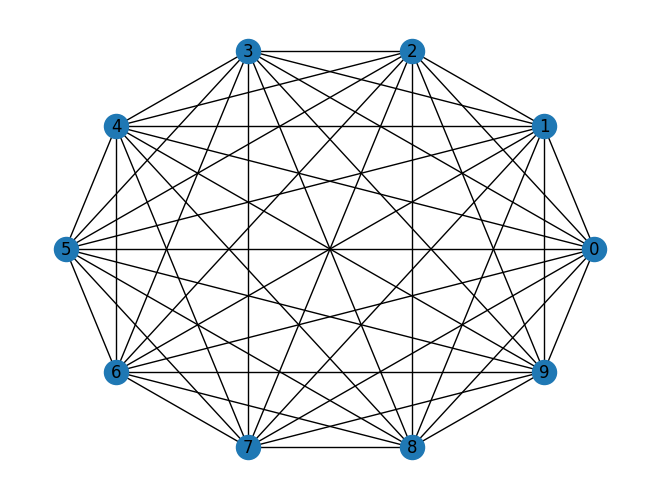

In [31]:
# draw this graph where nodes are placed in a circle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
G.add_nodes_from(range(n_nodes))
G.add_edges_from(edge_index.numpy().T)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()
